# AdaBoost

Let us implement the AdaBoost algorithm, to build a powerful emsemble classifier from a set of weaker classifiers. Our base classifier will be a decision stump.

The training algorithm we will implement is as follows. We have $N$ training datapoints and are creating an ensemble of $k$ classifiers.

- Initialize the weights for all datapoints ($w_j = 1/N$ for $j=1,2,...N$)
- For $i = 1$ to $k$
    - Form training set $D_i$ by sampling $N$ tuples (with replacement) from the full training dataset. The sampling probability for a tuple $(x_j,y_j)$ should be given by its corresponding weight $w_j$.
    - Use dataset $D_i$ to fit a decision stump $M_i$. You can use sklearn's DecisionTreeClassifier with max_depth=1 to fit a decision stump.
    - Calculate the error rate for $M_i$ using the sum of the weights of the misclassified points.
    $$err(M_i) = \sum_{j=1}^N w_j * \mathbb{1}\{y_j \ne M_i(x_j)\}$$
    - The weight of classifier $M_i$'s vote is computed as $\alpha_i = 0.5*\log(\frac{1-err(M_i)}{err(M_i)})$
    - Increase the weight of the misclassified training points, and decrease the weight of the correctly classified training points.
    $$w_j \leftarrow w_j * \exp\{- \alpha_i * y_j * M_i(x_j)\}$$
    - Remember to normalize the weights so that they sum to 1.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [ ]:
# Import the libraries / functions that you use in your solution
from sklearn.tree import DecisionTreeClassifier
def train_AdaBoost(X, y, k):
    classifiers = []
    alphas = []
    
    #classifiers = []
    #alphas = []
    
    ### BEGIN SOLUTION
    N = X.shape[0]
    D = np.concatenate((X, y.reshape(-1, 1)), axis=1)
    # Initialize weights
    W = np.ones(N)/N

    for i in range(k):
        # Sample from the dataset according to weights 
        # Fit a decision stump 
        dstump = DecisionTreeClassifier(max_depth = 1, random_state = 0)
        dstump.fit(X,y,sample_weight = W)
         
        # Calculate the error rate
        error_score = 0
        y_predict = dstump.predict(X)
        for j in range(N):
            if(y[j]!=y_predict[j]):
               error_score = error_score + (W[j]*1)
       
        # Calculate the weight of classifier's vote
        #print((1-error_score)/error_score)
        a_rate = 0.5 * np.log((1-error_score)/(error_score))
        # Increase the weight of misclassified points
    
        for j in range(N):
            val = y[j]*y_predict[j]
            W[j] = W[j]*math.exp(-a_rate * val)
        W = W/np.sum(W)
        #print(W)
        classifiers.append(dstump)
        alphas.append(a_rate)
    return classifiers,alphas                                 

To obtain predictions, the vote of each classifier $M_i$ is weighted by its corresponding coefficient $\alpha_i$.

$$y_i = \text{sign}\{\sum_{i=1}^k \alpha_i*M_i(x_i)\}$$

In [ ]:
def predict_AdaBoost(X,classifiers, alphas):
    
    ### BEGIN SOLUTION
    N = X.shape[0]
    C_count = len(classifiers)
    y_pred = np.zeros(N)
    temp_pred = np.zeros((N,C_count)) #Each column corresponds to each classifier perdicted output
    for k in range(C_count):
        temp_pred[:,k] = classifiers[k].predict(X)
    
    for i in range(N):
        sum = 0
        for k in range(C_count):
            sum = sum + (temp_pred[i,k]*alphas[k])
        if(sum<0):
          y_pred[i] = -1
        elif(sum>0):
          y_pred[i] = 1
    ### END SOLUTION
    
    # y_pred needs to be of type <class 'numpy.ndarray'>
    return y_pred

The below function will help you plot the decision surface given by the algorithm.

In [ ]:
def plot_AdaBoost(X, y, classifiers, alphas):
    
    # Get limits of x and y for plotting the decision surface
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    # Get points at a distance of h between the above limits 
    h = .02    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    temp = np.c_[xx.ravel(), yy.ravel()]
    
    # Classify the all the points
    P = predict_AdaBoost(temp, classifiers, alphas).reshape(yy.shape)
    
    # Plot the decision boundary and margin
    plt.pcolormesh(xx, yy, P, cmap=plt.cm.coolwarm, shading='auto')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm,edgecolor='k')
    plt.show()

Load the given datasets.

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/PRML/IITM/Question2/X_train.csv',header = None)
y_train = pd.read_csv('/content/drive/MyDrive/PRML/IITM/Question2/y_train.csv',header = None)
X_test = pd.read_csv('/content/drive/MyDrive/PRML/IITM/Question2/X_test.csv',header = None)
y_test = pd.read_csv('/content/drive/MyDrive/PRML/IITM/Question2/y_test.csv',header = None)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

Plot the training data as a scatter plot.

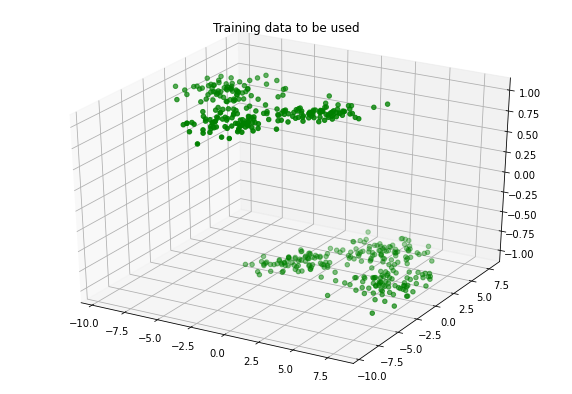

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
x = X_train[:,0]
y = X_train[:,1]
z = y_train
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax =  plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("Training data to be used")
 
# show plot
plt.show()

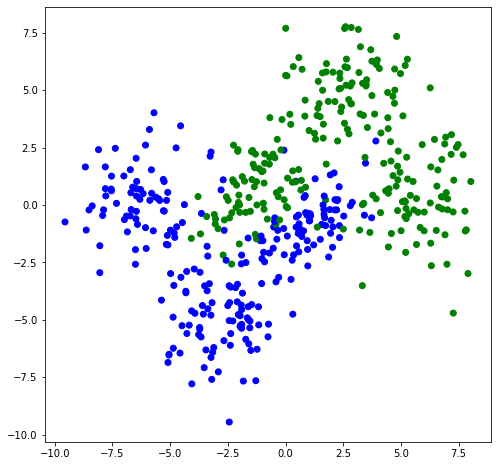

In [ ]:
import matplotlib
fig = plt.figure(figsize=(8,8))
colors = ['green','blue']
#plt.scatter(m, n, c=y_p, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train, cmap=matplotlib.colors.ListedColormap(colors))

Use the train_AdaBoost function to train an AdaBoost model with k=5.

In [ ]:
classifiers,alphas = train_AdaBoost(X_train,y_train,5)

Use the predict_AdaBoost function to make predictions on X_test.

In [ ]:
y_pred = predict_AdaBoost(X_test,classifiers,alphas)

Use the plot_AdaBoost function to plot the learnt decision surface.

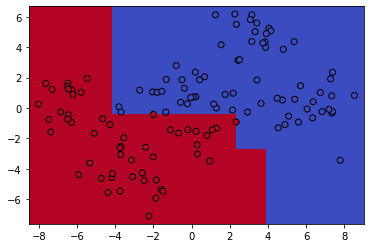

In [ ]:
plot_AdaBoost(X_test,y_pred,classifiers,alphas)

Compute the accuracy of the predictions on the test set.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9083333333333333



```
# This is formatted as code
```

Use the train_AdaBoost function to train an AdaBoost model with k=100.

In [ ]:
classifiers1,alphas1 = train_AdaBoost(X_train,y_train,100)

Use the predict_AdaBoost function to make predictions on X_test.

In [ ]:
y_pred1 = predict_AdaBoost(X_test,classifiers1,alphas1)

Use the plot_AdaBoost function to plot the learnt decision surface.

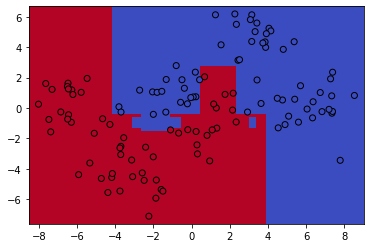

In [ ]:
plot_AdaBoost(X_test,y_pred1,classifiers1,alphas1)

Compute the accuracy of the predictions on the test set.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9083333333333333

In [ ]:
#******Comparing with standard library***********#
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=5, random_state=0)

In [ ]:
y_train = y_train.flatten()
clf = clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.925